In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('../netflix.mplstyle')
palette = {'primary': '#221f1f', 'secondary': '#b20710', 'accent': '#e50914', 'tertiary': '#f5f5f1'}

savefigs = False

In [2]:
netflix = pd.read_csv('../data/netflix_titles_clean.csv', index_col='show_id')
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
movies = netflix[netflix['type']=='Movie']
shows = netflix[netflix['type']=='TV Show']

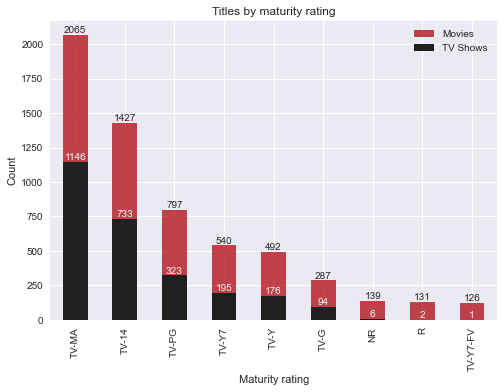

In [4]:
tv_rating_order = ('TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA')
tv_rating_meanings = ('All Children', 'Directed to Older Children', 'Directed to Older Children, Fantasy Violence', 'General Audience', 'Parental Guidance Suggested', 'Parents Strongly Cautioned', 'Mature Audience Only')

fig, ax = plt.subplots()
movies['rating'].value_counts().plot(kind='bar', ax=ax, alpha=0.75, color=palette['secondary'], label='Movies')
shows['rating'].value_counts().plot(kind='bar', ax=ax, label='TV Shows')

ax.set_title('Titles by maturity rating')
ax.set_xlabel('Maturity rating')
ax.set_ylabel('Count')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1], color=palette['tertiary'])

ax.legend()

if savefigs:
    plt.savefig('../images/svg/maturity_rating_distribution.svg', format="svg")
    plt.savefig('../images/png/maturity_rating_distribution.png', format="png", dpi=150, bbox_inches="tight")

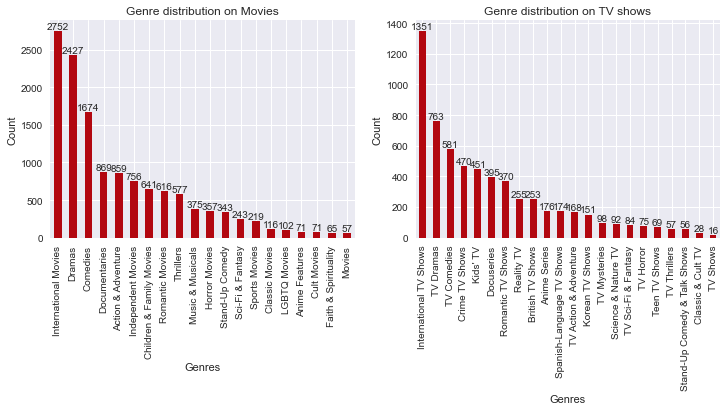

In [5]:
genre_count_tv = dict()
genre_count_movie = dict()

for _, value in movies['listed_in'].iteritems():
    for genre in value.split(', '):
        genre_count_movie[genre] = genre_count_movie.get(genre, 0) + 1

for _, value in shows['listed_in'].iteritems():
    for genre in value.split(', '):
        genre_count_tv[genre] = genre_count_tv.get(genre, 0) + 1

genre_tv = pd.Series(genre_count_tv)
genre_movie = pd.Series(genre_count_movie)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axs

genre_tv.sort_values(ascending=False).plot(kind='bar', ax=ax2, color=palette['secondary'])
ax2.set_title('Genre distribution on TV shows')
ax2.set_xlabel('Genres')
ax2.set_ylabel('Count')

genre_movie.sort_values(ascending=False).plot(kind='bar', ax=ax1, color=palette['secondary'])
ax1.set_title('Genre distribution on Movies')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Count')

for container in ax1.containers:
    ax1.bar_label(container)
for container in ax2.containers:
    ax2.bar_label(container)

if savefigs:
    plt.savefig('../images/svg/genre_distribution.svg', format="svg")
    plt.savefig('../images/png/genre_distribution.png', format="png", dpi=150, bbox_inches="tight")

del genre_count_tv, genre_count_movie, genre_tv, genre_movie

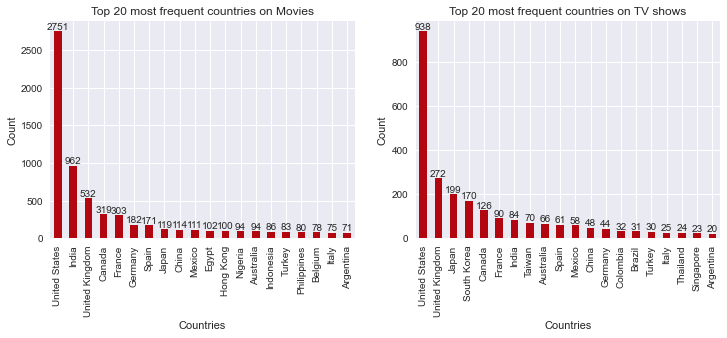

In [6]:
country_count_tv = dict()
country_count_movie =  dict()

filtered_movies = movies['country'][movies['country'].notnull()]
filtered_tv = shows['country'][shows['country'].notnull()]

for _, value in filtered_movies.iteritems():
    if value:
        for country in value.split(', '):
            country_count_movie[country] = country_count_movie.get(country, 0) + 1

for _, value in filtered_tv.iteritems():
    if value:
        for country in value.split(', '):
            country_count_tv[country] = country_count_tv.get(country, 0) + 1

country_tv = pd.Series(country_count_tv)
country_movie = pd.Series(country_count_movie)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axs

country_tv.nlargest(20).plot(kind='bar', ax=ax2, color=palette['secondary'])
ax2.set_title('Top 20 most frequent countries on TV shows')
ax2.set_xlabel('Countries')
ax2.set_ylabel('Count')

country_movie.nlargest(20).plot(kind='bar', ax=ax1, color=palette['secondary'])
ax1.set_title('Top 20 most frequent countries on Movies')
ax1.set_xlabel('Countries')
ax1.set_ylabel('Count')

for container in ax1.containers:
    ax1.bar_label(container)
for container in ax2.containers:
    ax2.bar_label(container)

if savefigs:
    plt.savefig('../images/svg/country_distribution.svg', format="svg")
    plt.savefig('../images/png/country_distribution.png', format="png", dpi=150, bbox_inches="tight")

del country_count_tv, country_count_movie, country_tv, country_movie, filtered_tv, filtered_movies


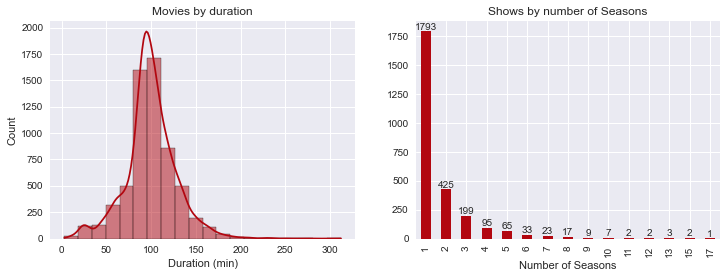

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axs

sns.histplot(movies['duration'], bins=20, ax=ax1, kde=True, color=palette['secondary'])
ax1.set_title('Movies by duration')
ax1.set_xlabel('Duration (min)')

shows.groupby('duration').count()['title'].plot(kind='bar', ax=ax2, color=palette['secondary'])
ax2.set_title('Shows by number of Seasons')
ax2.set_xlabel('Number of Seasons')

for container in ax2.containers:
    ax2.bar_label(container)

if savefigs:
    plt.savefig('../images/svg/duration_distribution.svg', format="svg")
    plt.savefig('../images/png/duration_distribution.png', format="png", dpi=150, bbox_inches="tight")